In [1]:
import os
import pickle

PROJECT_DIR="."
CHAPTER_ID="Visualizations"
IMAGES_PATH= os.path.join(PROJECT_DIR, "Images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print(f" Figure '{fig_id}' Saved.")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set();


from xgboost import XGBClassifier
import lightgbm as gbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report



In [3]:
train=pd.read_csv('Datasets/train.csv', encoding='iso-8859-1', on_bad_lines='skip')
test=pd.read_csv('Datasets/Test.csv', encoding='iso-8859-1', on_bad_lines='skip')

In [4]:
print(f"The shape of the train data: {train.shape}\nThe shape of the test data: {test.shape}")

The shape of the train data: (18506, 21)
The shape of the test data: (6169, 20)


In [5]:
train.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [6]:
test.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                6169 non-null   object 
 1   country                6169 non-null   object 
 2   age_group              6169 non-null   object 
 3   travel_with            5808 non-null   object 
 4   total_female           6167 non-null   float64
 5   total_male             6168 non-null   float64
 6   purpose                6169 non-null   object 
 7   main_activity          6169 non-null   object 
 8   info_source            6169 non-null   object 
 9   tour_arrangement       6169 non-null   object 
 10  package_transport_int  6169 non-null   object 
 11  package_accomodation   6169 non-null   object 
 12  package_food           6169 non-null   object 
 13  package_transport_tz   6169 non-null   object 
 14  package_sightseeing    6169 non-null   object 
 15  pack

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,18504.0,0.936230,1.215582,0.0,0.0,1.0,1.0,49.0
total_male,18500.0,0.998757,1.173177,0.0,1.0,1.0,1.0,58.0
night_mainland,18506.0,9.141576,14.127449,0.0,3.0,6.0,11.0,365.0
night_zanzibar,18506.0,2.493516,5.275156,0.0,0.0,0.0,4.0,240.0


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,6167.0,0.922491,1.173067,0.0,0.0,1.0,1.0,30.0
total_male,6168.0,1.017510,1.526274,0.0,1.0,1.0,1.0,90.0
night_mainland,6169.0,9.311720,16.366900,0.0,3.0,6.0,11.0,664.0
night_zanzibar,6169.0,2.585832,5.465058,0.0,0.0,0.0,4.0,174.0


In [11]:
train.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

In [12]:
test.isna().sum()

Tour_ID                    0
country                    0
age_group                  0
travel_with              361
total_female               2
total_male                 1
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
first_trip_tz              0
dtype: int64

In [13]:
train['Tour_ID'].isin( test['Tour_ID']).sum()

0

### EDA
- From here on, I'll be using only the `train` dataset, the test dataset is reserved for the final validation purposes.

 Figure 'Cost_Category_Dist' Saved.


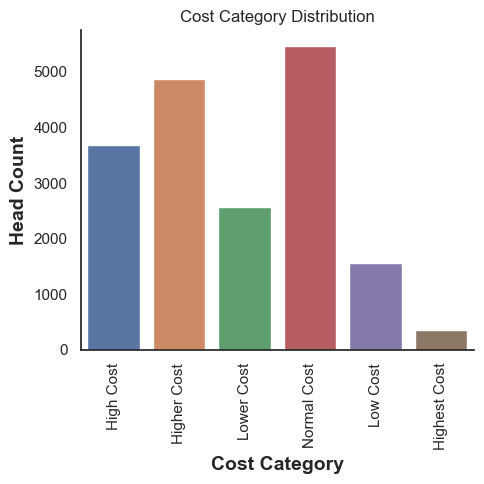

In [14]:
#Distribution of the target class.
sns.set(style="white", color_codes=True)

ax=sns.catplot(x="cost_category", data=train, kind="count")
plt.title("Cost Category Distribution")
plt.xlabel("Cost Category", weight="bold", size=14)
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=90)
save_fig("Cost_Category_Dist", tight_layout=True)
plt.show()

 Figure 'Cost category by Age group' Saved.


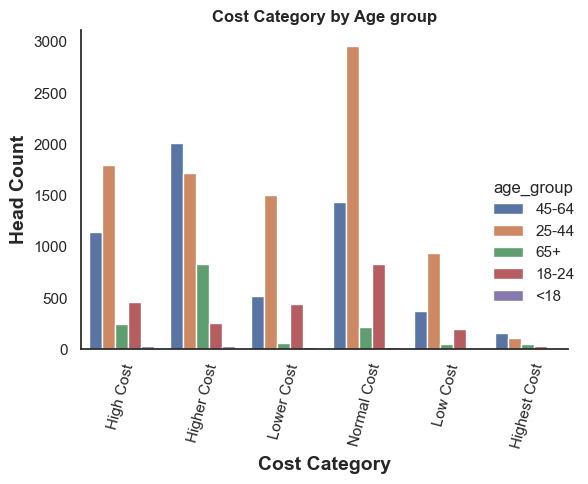

In [15]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="age_group")
plt.title("Cost Category by Age group", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
save_fig("Cost category by Age group", tight_layout=True)
plt.show();

 Figure 'Cost category by Travel With' Saved.


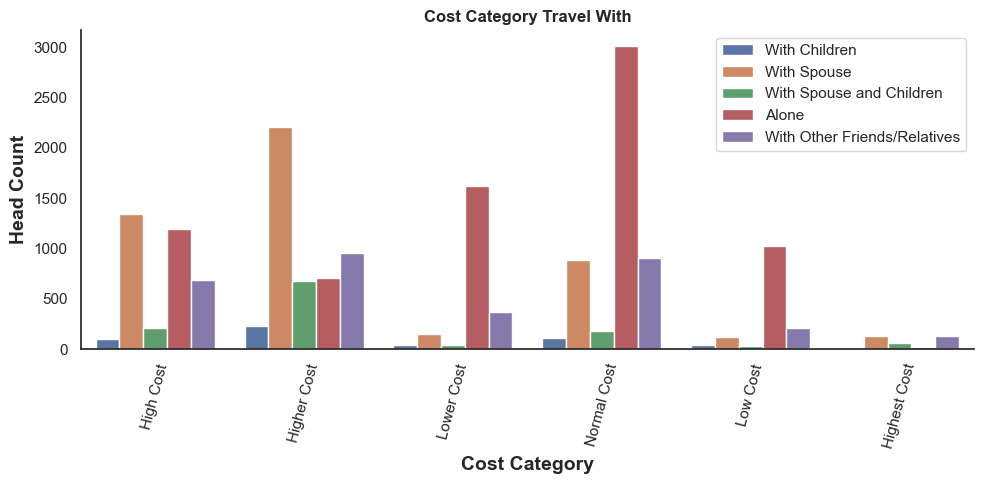

In [16]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="travel_with", aspect=2.0, legend_out=False)
plt.title("Cost Category Travel With", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
plt.legend(loc="upper right")
save_fig("Cost category by Travel With", tight_layout=True)
plt.show();

 Figure 'Cost category by group size' Saved.


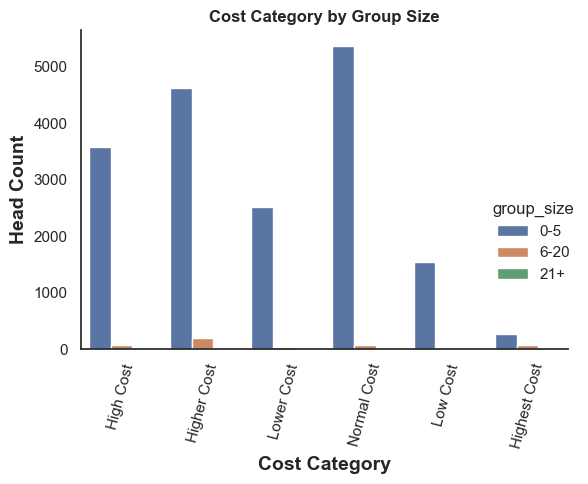

In [17]:
train['total_people']=train["total_female"]+ train["total_male"]
bins=[0,5,20,100]
labels=["0-5", "6-20", '21+']

train['group_size']=pd.cut(train['total_people'], bins=bins, labels=labels)

sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="group_size")
plt.title("Cost Category by Group Size", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
save_fig("Cost category by group size", tight_layout=True)
plt.show();

In [18]:
print(f"{train.group_size.value_counts()}\n\nMaximum number of people in one travel group: {train.total_people.max()}\n\nFrequent number of people in one travel group: {train.total_people.mode()}")

0-5     17901
6-20      476
21+        27
Name: group_size, dtype: int64

Maximum number of people in one travel group: 93.0

Frequent number of people in one travel group: 0    1.0
Name: total_people, dtype: float64


 Figure 'Cost category by first trip to TZ' Saved.


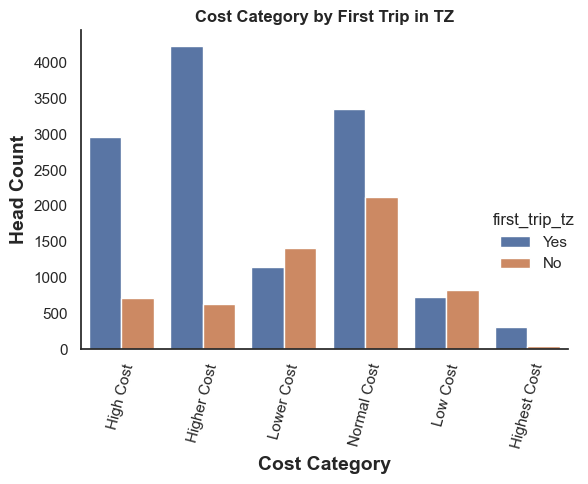

In [19]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="first_trip_tz")
plt.title("Cost Category by First Trip in TZ", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
save_fig("Cost category by first trip to TZ", tight_layout=True)
plt.show();

 Figure 'Info Source vs First Trip Tz' Saved.


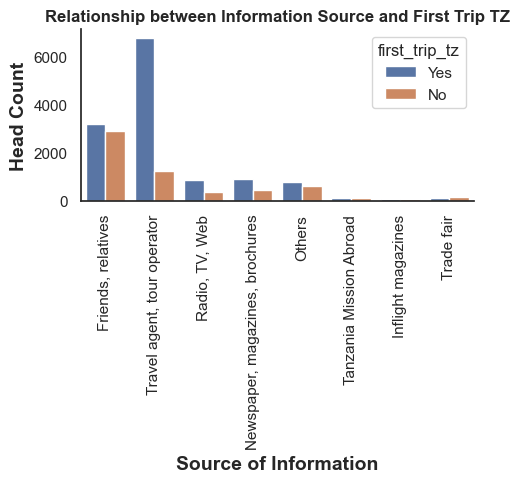

In [20]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="info_source", data=train, kind="count", hue="first_trip_tz", legend_out=False)
plt.title("Relationship between Information Source and First Trip TZ", weight="bold")
plt.xlabel("Source of Information", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=90)
#plt.legend(loc="upper right")
save_fig("Info Source vs First Trip Tz", tight_layout=True)
plt.show();

 Figure 'Cost category by Info Source' Saved.


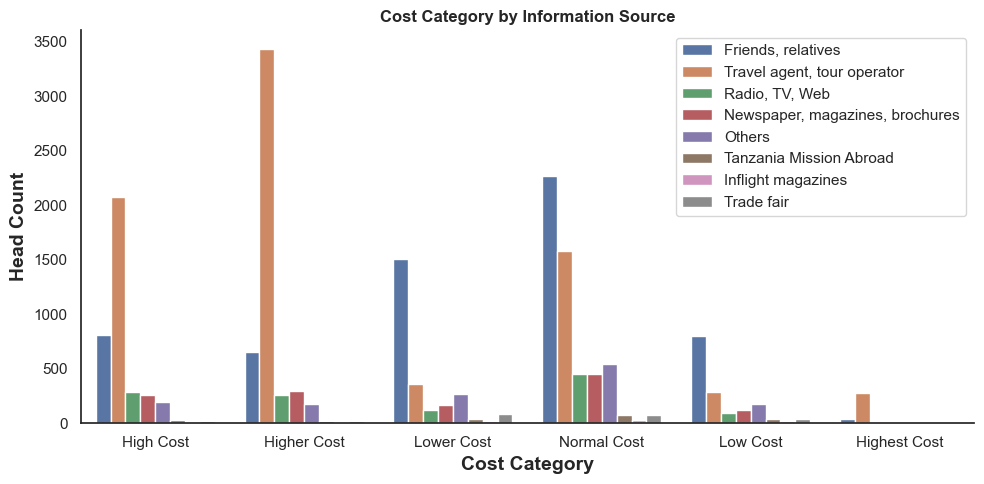

In [21]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="info_source", aspect=2.0, legend_out=False)
plt.title("Cost Category by Information Source", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=0)
plt.legend(loc="upper right")
save_fig("Cost category by Info Source", tight_layout=True)
plt.show();

### Visualizing relationships Between Categorical Variables.

In [22]:
def plot_categorical(data, x, y, title=None, xlabel=None, ylabel=None):
    ct=pd.crosstab(data[x], data[y])
    
    fig, axes=plt.subplots(nrows=1,ncols=2, figsize=(12,8))
    
    sns.heatmap(ct, cmap='viridis', annot=True, cbar=False, fmt='g', ax=axes[0])
    axes[0].set_title('Heatmap' if title is None else title)
    axes[0].set_xlabel('' if xlabel is None else xlabel)
    axes[0].set_ylabel('' if ylabel is None else ylabel)
    
    #stacked_data = ct.apply(lambda x: x / x.sum(), axis=1)
    ct.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title('Bar Chart' if title is None else title)
    axes[1].set_xlabel('' if xlabel is None else xlabel)
    axes[1].set_ylabel('' if ylabel is None else ylabel)
    axes[1].legend(title=y)
    
    """
    for patch in axes[1].patches:
        x, y = patch.get_xy()
        width, height = patch.get_width(), patch.get_height()
        axes[1].text(x + width/2, y + height/2, f'{height:.0%}', ha='center', va='center')
    
    """
    
    fig.suptitle(f"Relationship between {x} and {y}", fontsize=16, weight='bold')
    

 Figure 'Cost Category and Info Source' Saved.


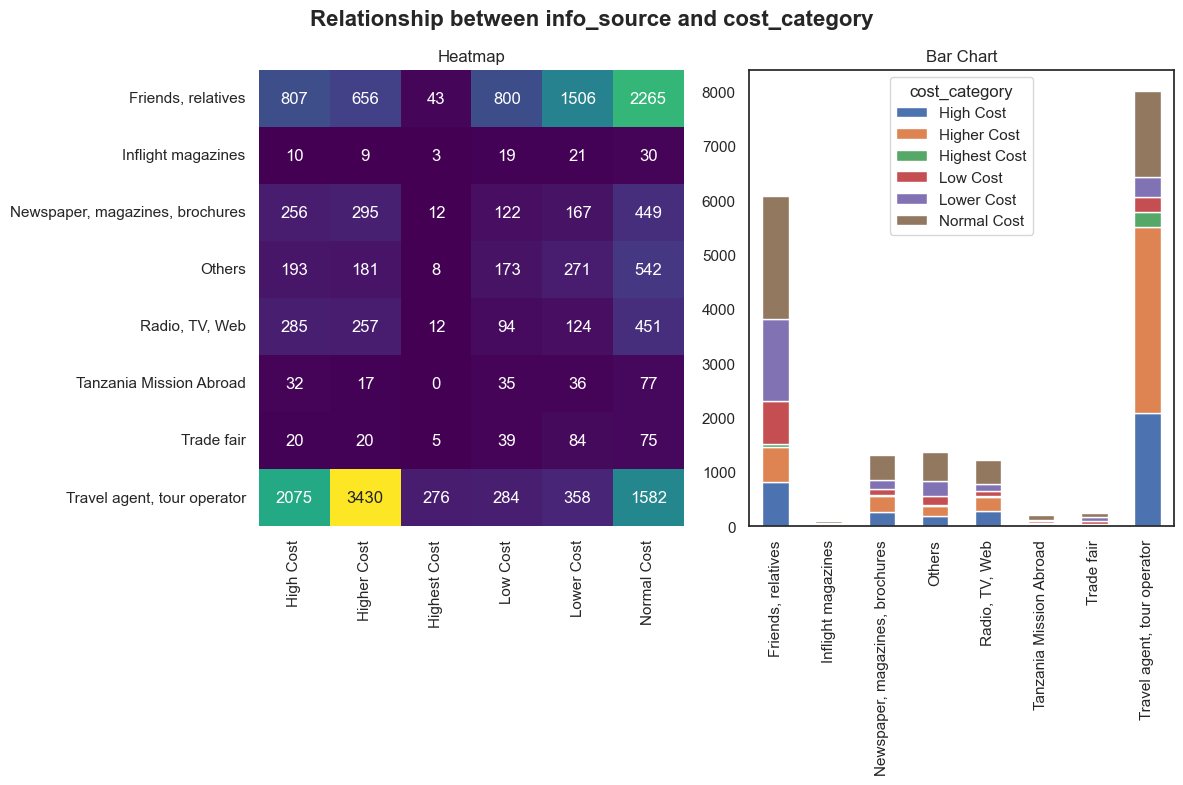

In [23]:
plot_categorical(train, "info_source", "cost_category")
save_fig("Cost Category and Info Source")

 Figure 'Relationship between Cost category and Information source' Saved.


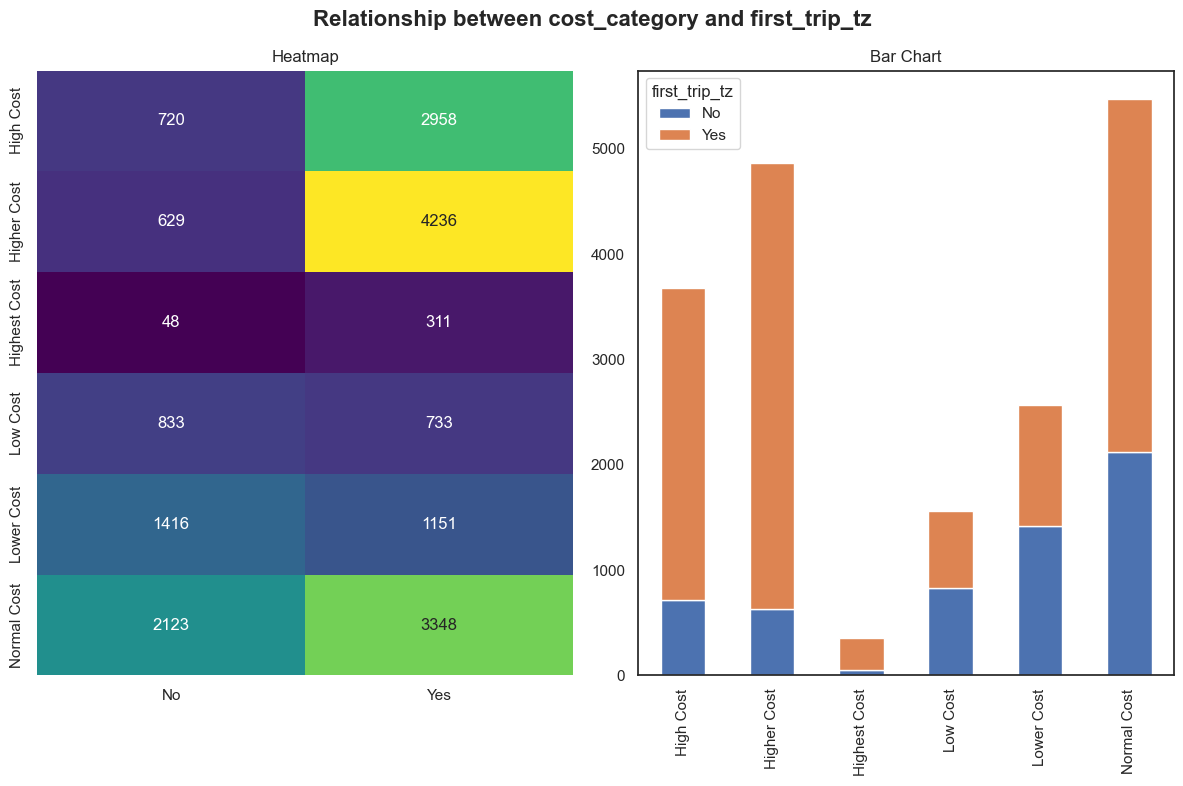

In [24]:
plot_categorical(train, "cost_category", "first_trip_tz")
save_fig("Relationship between Cost category and Information source")

 Figure 'Relationship between cost category and purpose of visit' Saved.


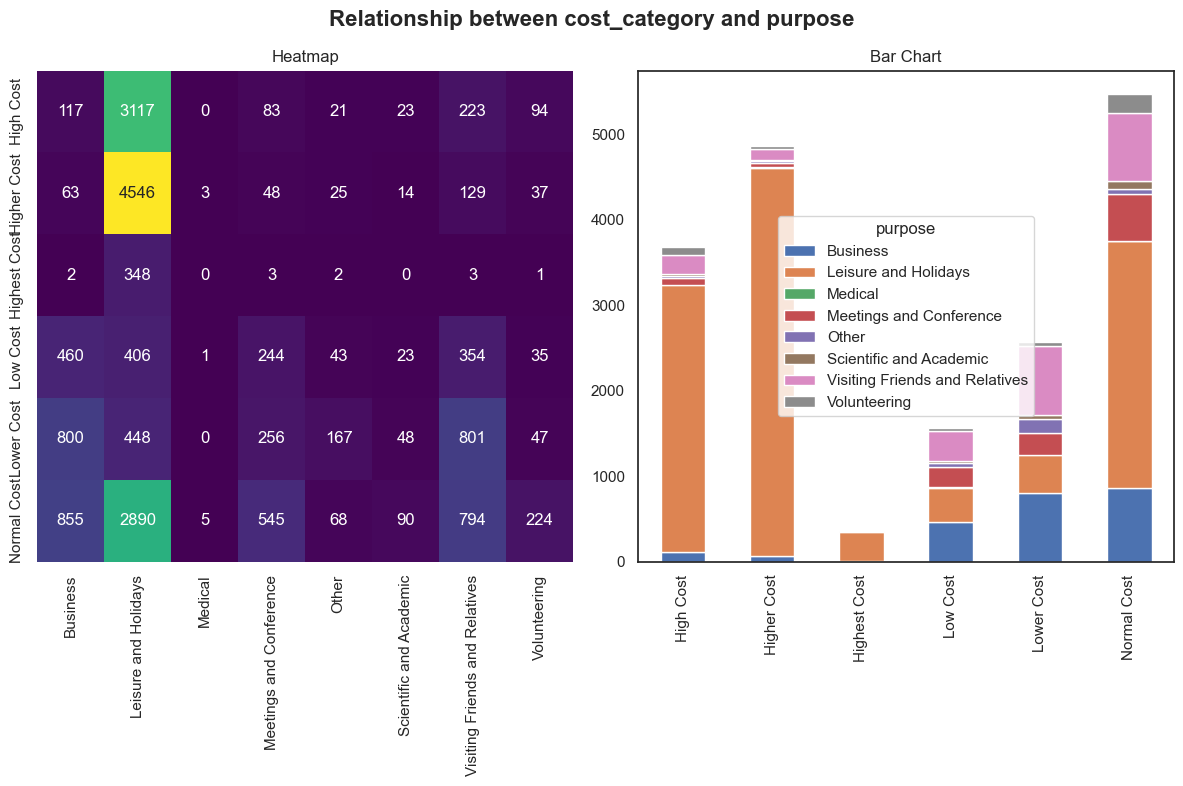

In [25]:
plot_categorical(train, "cost_category", "purpose")
save_fig("Relationship between cost category and purpose of visit")

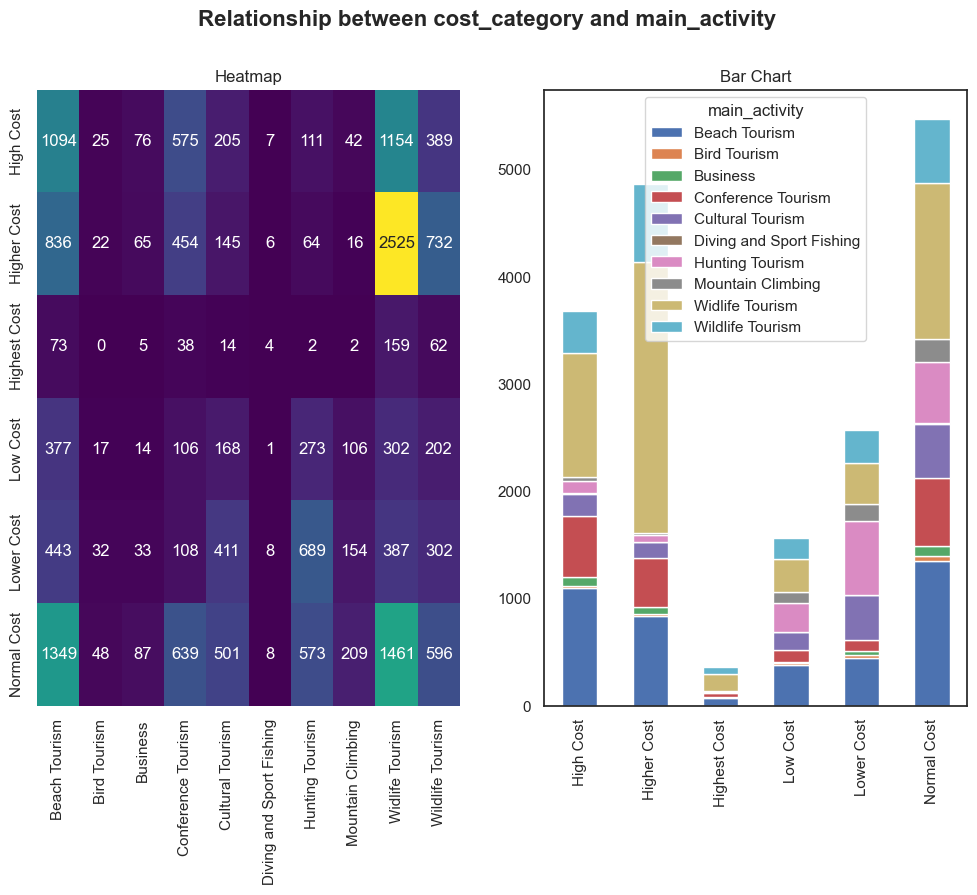

In [26]:
plot_categorical(train, "cost_category", "main_activity")

 Figure 'Relationship between cost category and main activity of the visit' Saved.


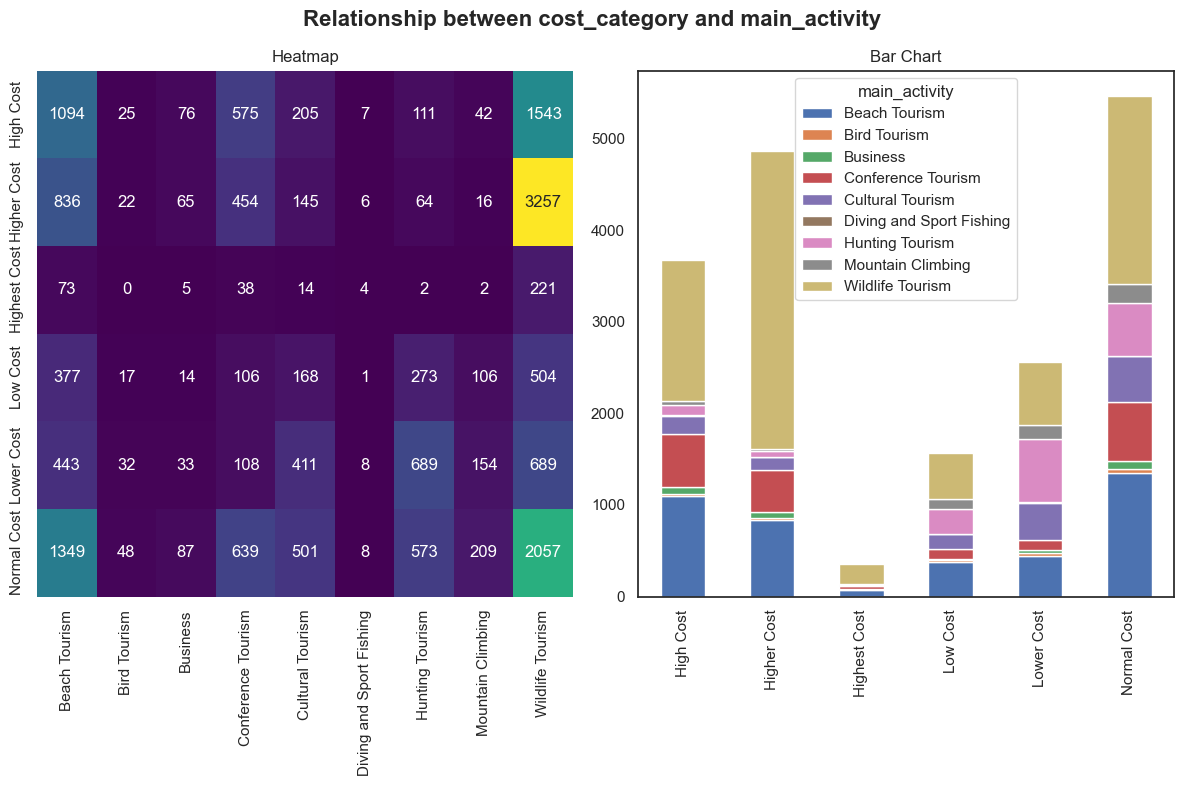

In [27]:
train['main_activity']=train['main_activity'].replace('Widlife Tourism','Wildlife Tourism')
plot_categorical(train, "cost_category", "main_activity")
save_fig("Relationship between cost category and main activity of the visit")

 Figure 'Cost category as per travel groups' Saved.


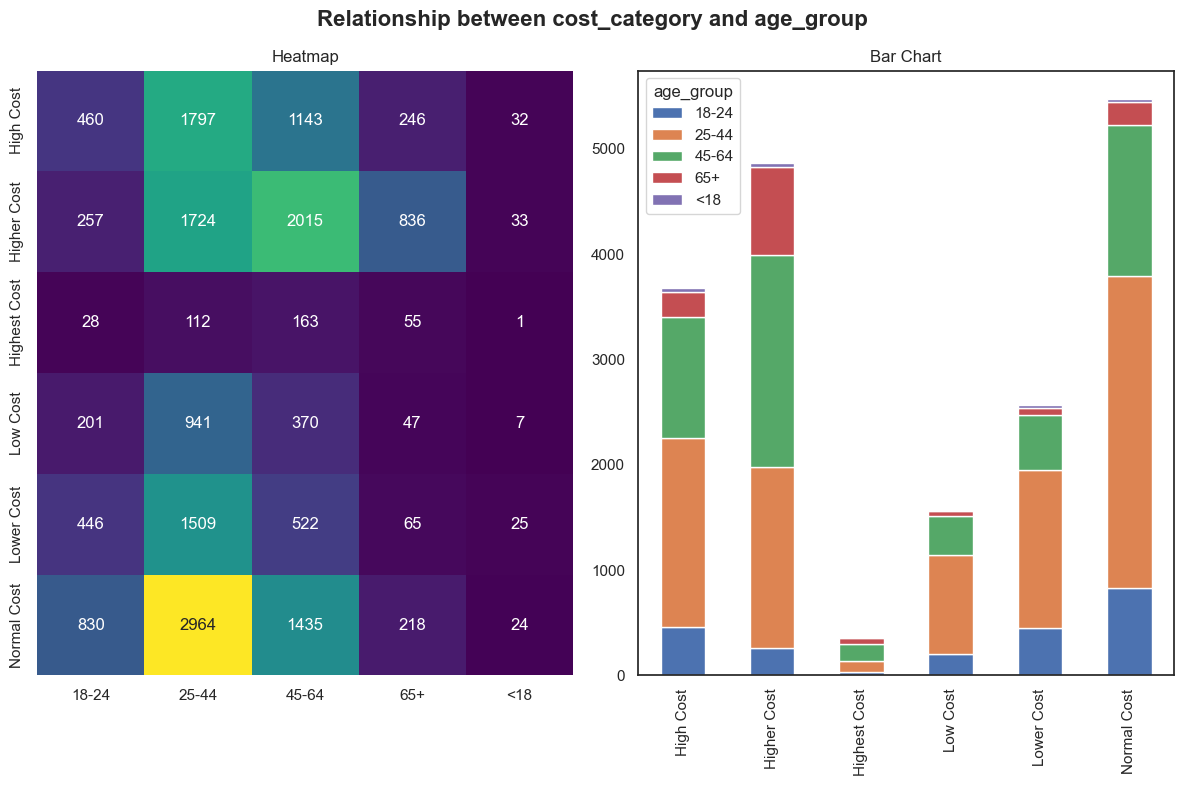

In [28]:
plot_categorical(train, "cost_category", "age_group")
save_fig("Cost category as per travel groups")

 Figure 'Relationship between travel with and age group' Saved.


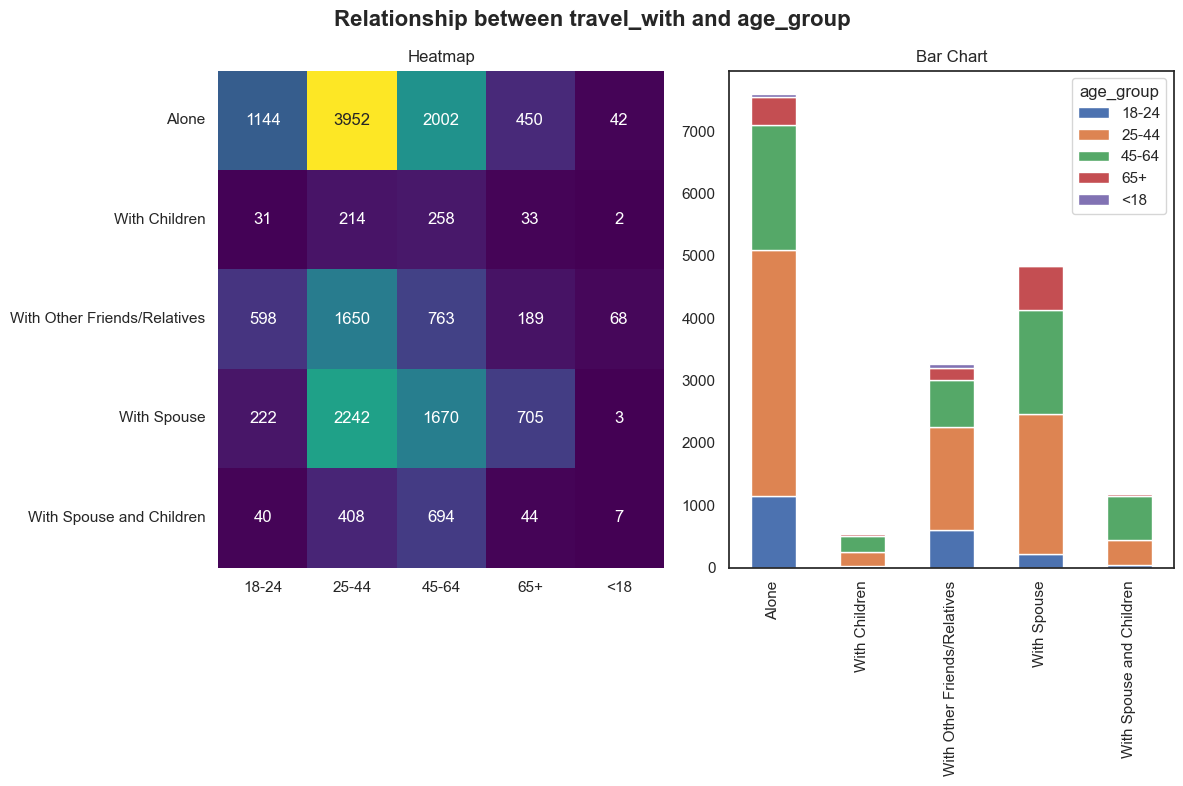

In [29]:
plot_categorical(train,"travel_with", "age_group")
save_fig("Relationship between travel with and age group")

 Figure 'Cost Category by Top 5 country of origin' Saved.


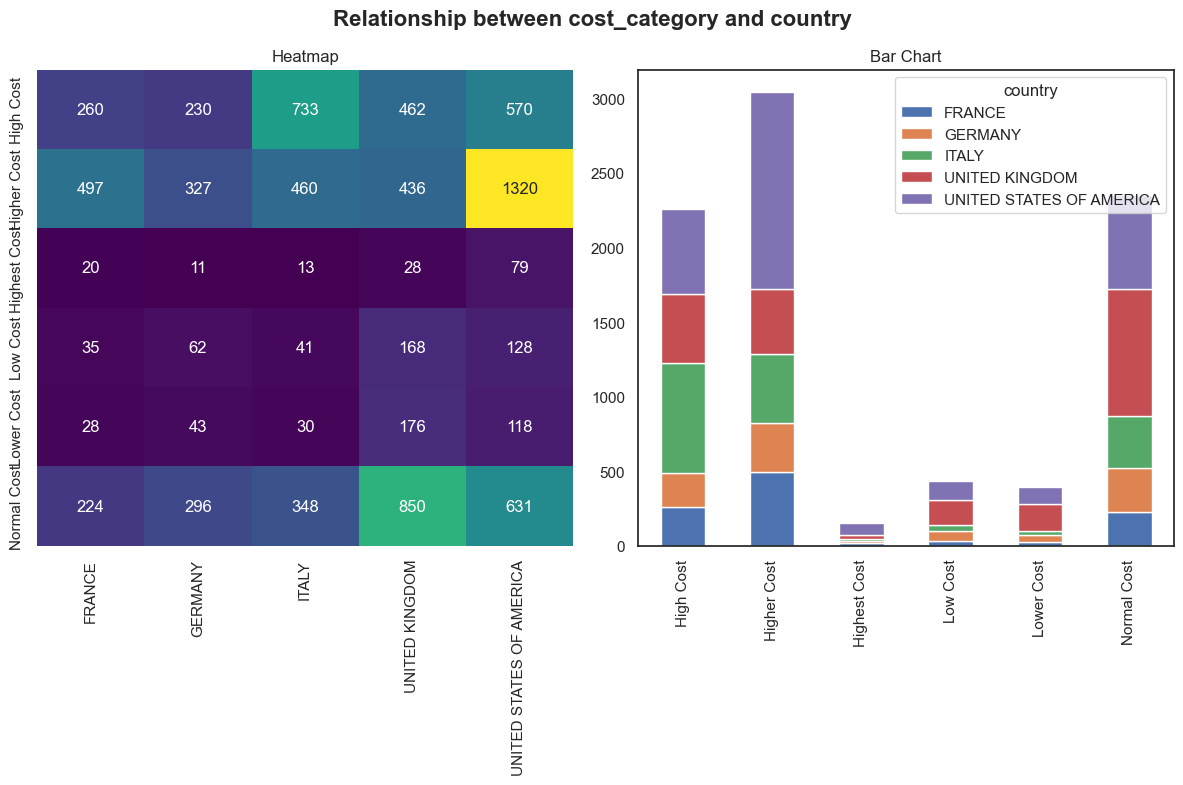

In [30]:
country = train.country.value_counts()[:5].index.tolist()
plot_categorical(train.loc[train.country.isin(country)], "cost_category", "country")
save_fig("Cost Category by Top 5 country of origin")

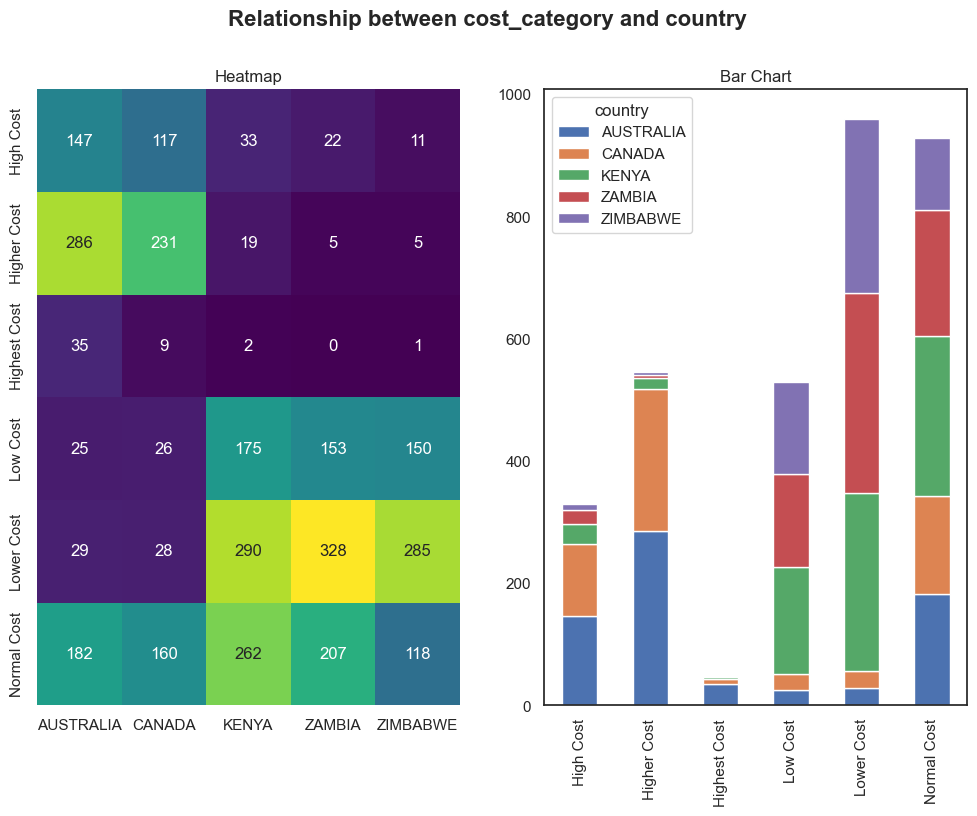

In [31]:
country=train.country.value_counts()[6:11].index.tolist()
plot_categorical(train.loc[train.country.isin(country)], "cost_category", "country")

 Figure 'Cost Category by Length of the Trip' Saved.


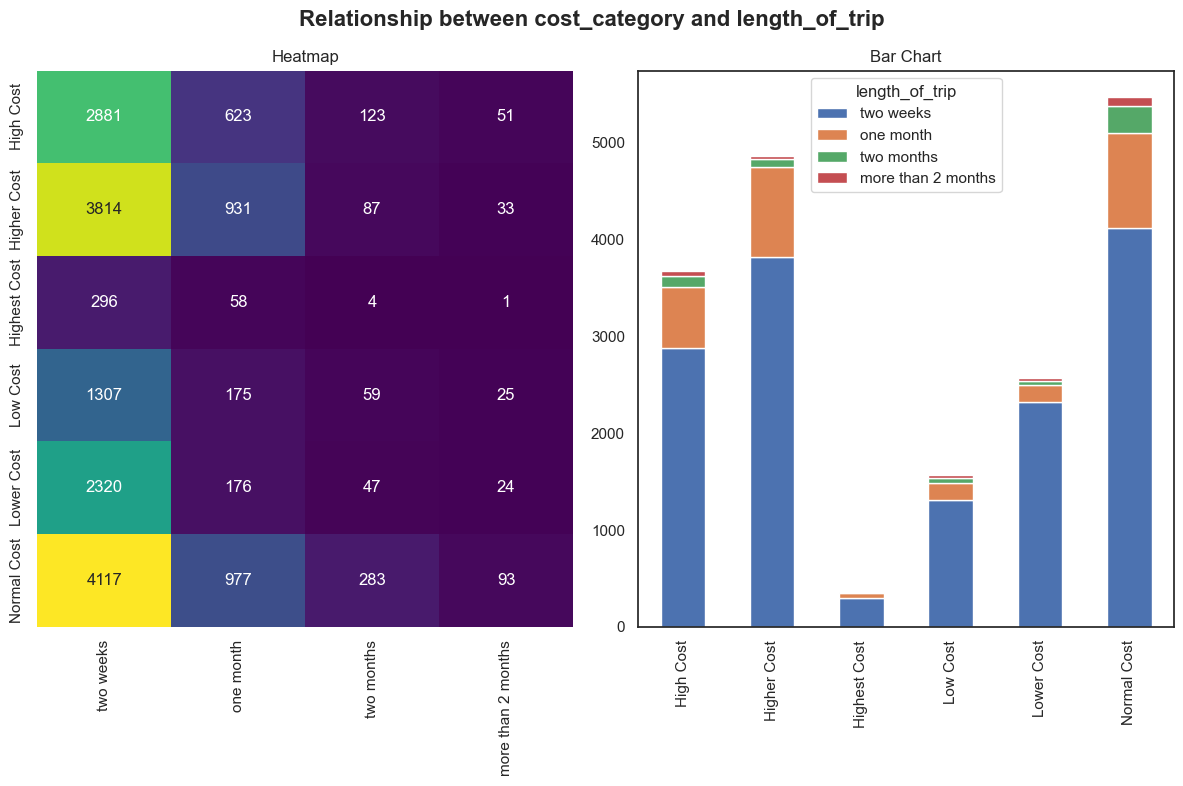

In [35]:
train['total_nights']=train['night_mainland']+train['night_zanzibar']
bins=[0,14,30,60,365]
labels=["two weeks","one month","two months", "more than 2 months"]
train['length_of_trip']=pd.cut(train['total_nights'], bins=bins, labels=labels)
plot_categorical(train, 'cost_category', 'length_of_trip')
save_fig('Cost Category by Length of the Trip')

### Preprocessing.

In [37]:
col_drop=['Tour_ID', 'total_people', 'group_size', 'total_nights', 'length_of_trip' ]
print(f"Shape of train before dropping some columns: {train.shape}")
train=train.drop(columns=col_drop, axis=1)
print(f"Shape of train after dropping some columns: {train.shape}")

Shape of train before dropping some columns: (18506, 25)
Shape of train after dropping some columns: (18506, 20)


In [38]:
train.keys()

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'cost_category'],
      dtype='object')

In [46]:
training=train.copy()

In [47]:
y=training['cost_category']
training=training.drop('cost_category', axis=1)

In [48]:
training.shape, y.shape

((18506, 19), (18506,))

In [72]:
#cat=[col for col in train.select_dtypes(['object', 'category']).columns if col not in ['cost_category']]
num=[col for col in training.select_dtypes(['int', 'float']).columns]
cat=[]
text=[]

for col in training.select_dtypes(['object', 'category']).columns:
    unique_val= len(training[col].unique())
    
    if unique_val <= 200:
        cat.append(col)
    else:
        text.append(col)
print(f"Categorical Columns: {cat}\n\nNumerical Columns: {num}\n\nText Columns: {text}")

Categorical Columns: ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz']

Numerical Columns: ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']

Text Columns: []


In [73]:
len(cat), len(num), len(text)

(15, 4, 0)

In [51]:
training.isnull().sum()

country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
dtype: int64

In [52]:
p_missing=training.isnull().sum()*100/len(training)
missing=pd.DataFrame({"columns":training.columns,
                         "percentage missing": p_missing})
missing.reset_index(drop=True, inplace=True)
missing

,columns,percentage missing
0,country,0.000000
1,age_group,0.000000
2,travel_with,5.808927
3,total_female,0.010807
4,total_male,0.032422
5,purpose,0.000000
6,main_activity,0.000000
7,info_source,0.000000
8,tour_arrangement,0.000000
9,package_transport_int,0.000000


### Pipelines to preprocess the data

In [74]:
num_pipeline=Pipeline([
    ("imputer", KNNImputer(n_neighbors=3)),
    ("scaler",StandardScaler()),
])

cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

text_pipeline=Pipeline([
    ('vectorizer', CountVectorizer()),
    ('imputer', SimpleImputer(strategy="most_frequent")),
])

pipe=ColumnTransformer([
    ("num", num_pipeline, num),
    ("cat", cat_pipeline, cat),
    ("text", text_pipeline, text),
])

In [55]:
training.dtypes

country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
dtype: object

In [77]:
training=pipe.fit_transform(training[cat+num])
training

TypeError: cannot perform reduce with flexible type

In [78]:
training.shape

(18506, 188)

In [70]:
y.shape

(18506,)

In [88]:
y=cat_pipeline.fit_transform([y])
y

<1x18506 sparse matrix of type '<class 'numpy.float64'>'
	with 18506 stored elements in Compressed Sparse Row format>

In [90]:
y=y.reshape(-1,1)

### Building the models

In [91]:
X_train,X_test, y_train,y_test=train_test_split(training, y, test_size=0.2, random_state=42) 

In [94]:
X_train=X_train.toarray()

In [96]:
y_train=y_train.toarray()

In [99]:
gn=GaussianNB()
gn.fit(X_train, y_train)

GaussianNB()

In [101]:
X_test=X_test.toarray()

In [102]:
y_pres=gn.predict(X_test)

In [103]:
scores=cross_val_score(gn, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

1.0

In [108]:
y_test=y_test.toarray()

In [109]:
score=f1_score(y_pres, y_test)
score

1.0

In [111]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(20,15,25))
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 15, 25))

In [112]:
nn.predict(X_test)
scores=cross_val_score(nn, X_train, y_train, cv=15)
scores.mean()

<IPython.core.display.Javascript object>

1.0

In [114]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [115]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=8,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [116]:
y_pred=model.predict(X_test)

In [ ]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>